In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data/logs/simulated_audit_logs.csv", parse_dates=["timestamp"])
df.head()

,timestamp,user,ip_address,event_type,resource
0,2025-07-06 07:27:18.130801,user_4,47.172.78.228,login_success,wp-content
1,2025-07-07 18:23:27.693557,user_9,203.75.32.207,login_success,tag/app/wp-content
2,2025-07-04 07:11:21.453382,user_5,58.217.105.169,login_failure,tags
3,2025-07-05 13:23:49.326303,user_18,42.55.219.177,login_success,tag/search/wp-content
4,2025-07-08 04:07:09.391192,user_14,70.48.153.229,login_success,list/tags


### Info and description

In [3]:
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   timestamp   5000 non-null   datetime64[ns]
 1   user        5000 non-null   object        
 2   ip_address  5000 non-null   object        
 3   event_type  5000 non-null   object        
 4   resource    5000 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 195.4+ KB


,timestamp,user,ip_address,event_type,resource
count,5000,5000,5000,5000,5000
unique,NaN,20,5000,5,1203
top,NaN,user_5,47.172.78.228,login_success,categories
freq,NaN,285,1,2544,159
mean,2025-07-04 07:27:03.434337280,NaN,NaN,NaN,NaN
min,2025-06-26 17:16:27.282458,NaN,NaN,NaN,NaN
25%,2025-06-30 15:12:23.561887744,NaN,NaN,NaN,NaN
50%,2025-07-04 07:21:13.162460928,NaN,NaN,NaN,NaN
75%,2025-07-08 00:57:23.749162240,NaN,NaN,NaN,NaN
max,2025-07-11 17:15:10.700949,NaN,NaN,NaN,NaN


### Events over time

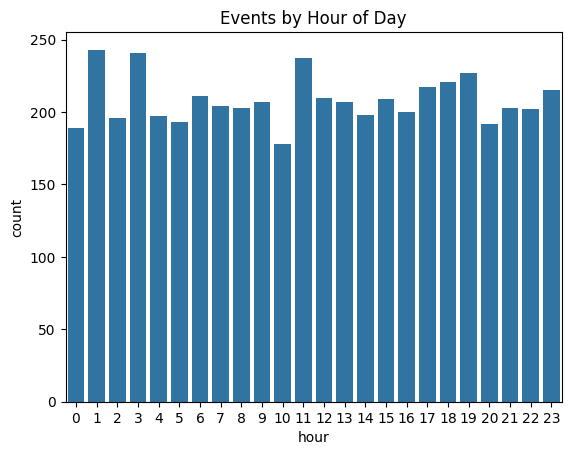

In [4]:
df["hour"] = df["timestamp"].dt.hour
sns.countplot(data=df, x="hour")
plt.title("Events by Hour of Day")
plt.show()

### Event type distribution

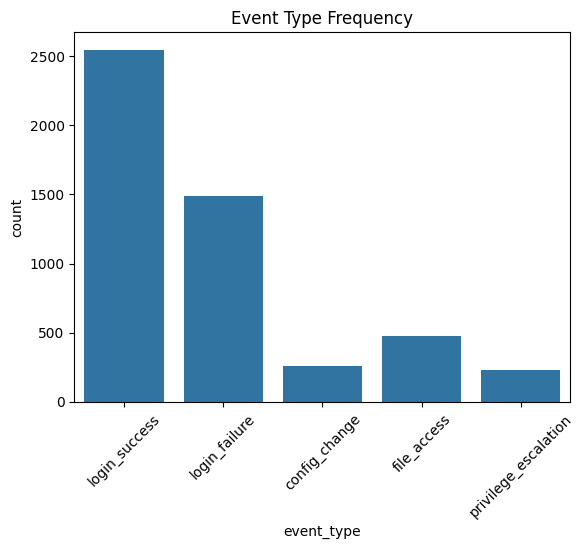

In [5]:
sns.countplot(data=df, x="event_type")
plt.title("Event Type Frequency")
plt.xticks(rotation=45)
plt.show()

### Suspicious users

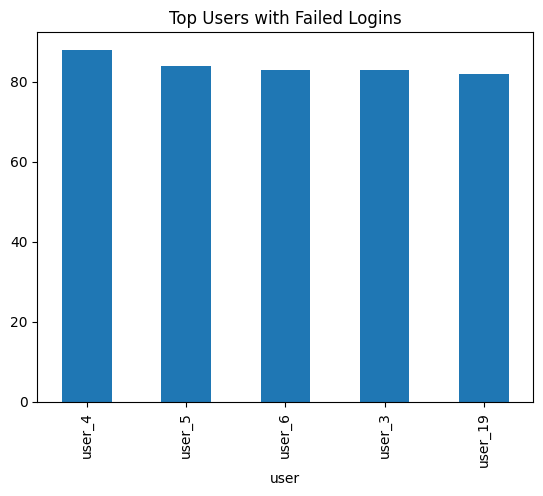

In [6]:
failures = df[df["event_type"] == "login_failure"]
top_failed = failures["user"].value_counts().head(5)
top_failed.plot(kind="bar", title="Top Users with Failed Logins")
plt.show()

### IP vs Event type

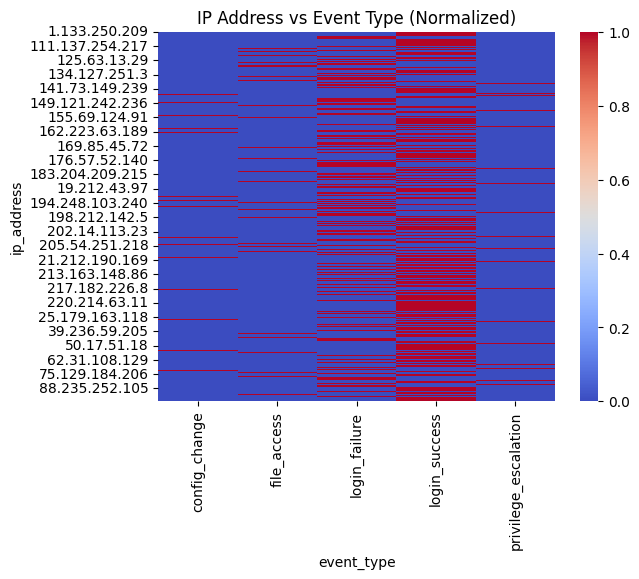

In [7]:
heatmap_data = pd.crosstab(df["ip_address"], df["event_type"])
sns.heatmap(heatmap_data.apply(lambda x: x / x.sum(), axis=1), cmap="coolwarm")
plt.title("IP Address vs Event Type (Normalized)")
plt.show()